In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
insurance = pd.read_csv('datasets/insurance.csv')
insurance.sample(10)

,age,sex,bmi,children,smoker,region,charges
253,27,male,30.300,3,no,southwest,4260.74400
453,20,male,29.735,0,no,northwest,1769.53165
200,19,female,32.110,0,no,northwest,2130.67590
1131,27,male,45.900,2,no,southwest,3693.42800
414,19,female,35.150,0,no,northwest,2134.90150
531,62,female,31.730,0,no,northeast,14043.47670
1253,40,female,29.300,4,no,southwest,15828.82173
1009,51,male,27.740,1,no,northeast,9957.72160
956,54,male,30.800,1,yes,southeast,41999.52000
1303,43,male,27.800,0,yes,southwest,37829.72420


In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Exploratory Data Analysis

In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


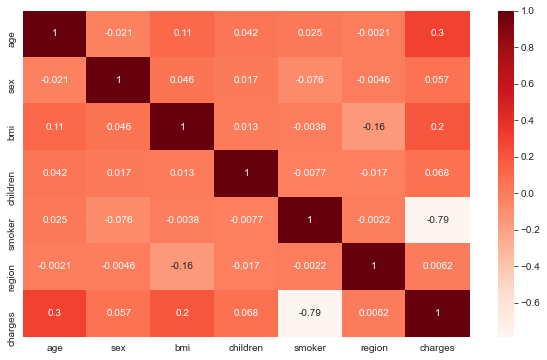

In [6]:
#Correlation between the columns

ins = insurance.copy()

for col in ins.columns:
    if ins[col].dtype == 'object':
        ins[col] = pd.factorize(ins[col])[0]
        
plt.figure(figsize = (10, 6))
sns.set_style(style='darkgrid')
sns.heatmap(ins.corr(), annot=True, cmap='Reds');

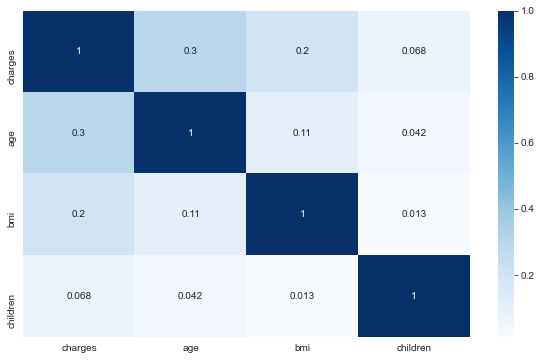

In [7]:
#Correlation with target

k = 4
cols = insurance.corr().nlargest(k, 'charges')['charges'].index
cm = insurance[cols].corr()
plt.figure(figsize = (10, 6))
sns.set_style(style='darkgrid')
sns.heatmap(cm, annot=True, cmap='Blues');

### Observations

- There is co-relation between charges & bmi and charges & ages.
- Corelation found between age & bmi
- Also charges for smoking is negatively corelated
- There is almost no relation between region & charges
- there's almost no correlation between bmi & region
- Some positive correlation is there for age & children which is obvious

## Univariate Analysis

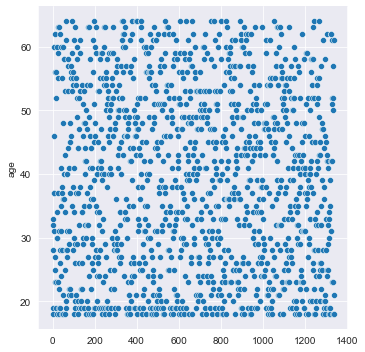

In [8]:
# Age

sns.relplot(y=insurance['age'], x= insurance.index, data = insurance);

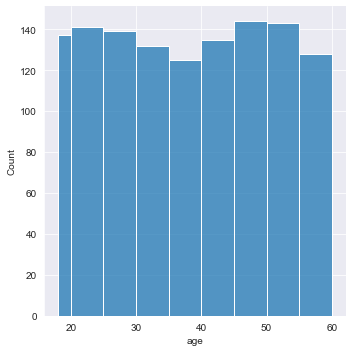

In [9]:
sns.displot(insurance['age'], bins=[18, 20, 25, 30, 35, 40, 45, 50, 55, 60, np.inf]);

### Observations
- Age seems to be uniformly distributed
- Dont find outliers as such at this point of time

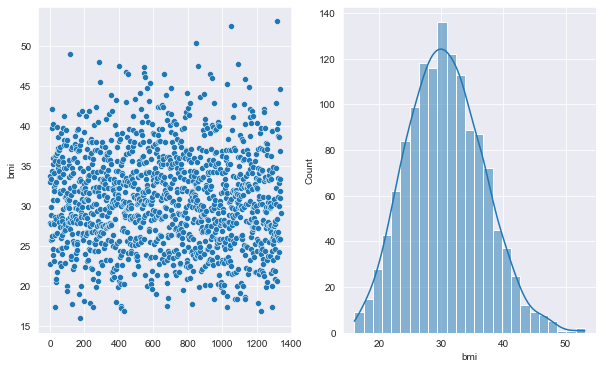

In [10]:
#bmi

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

sns.scatterplot(y=insurance['bmi'], x= insurance.index, data = insurance, ax=axes[0])
sns.histplot(insurance['bmi'], kde=True, ax=axes[1]);

### Observation

- bmi has a slightly skewed and has a peak.
- we can consider bmi above 50 as outliers

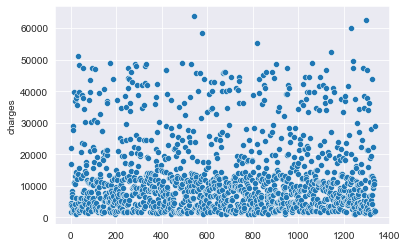

In [11]:
#charges

sns.scatterplot(y=insurance['charges'], x= insurance.index, data = insurance);

### Observation

- we can consider charges above 50000 as outliers.
- Mostly charges are below 20000 and thereafter the frequency decreases gradually.

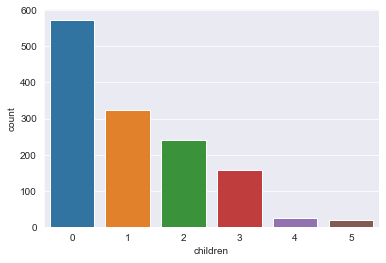

In [12]:
#children

sns.countplot(x = 'children', data = insurance);

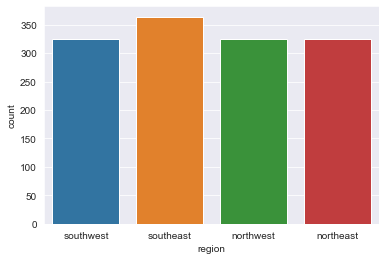

In [13]:
#region

sns.countplot(x = 'region', data = insurance);

In [14]:
#smoker

insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [15]:
#sex

insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

### Observation

- rows with no children is significantly more.
- positive smokers are less in count
- data taken from different region are almost in symmetry
- data is pretty even for both male and female

## Multivariate Analysis

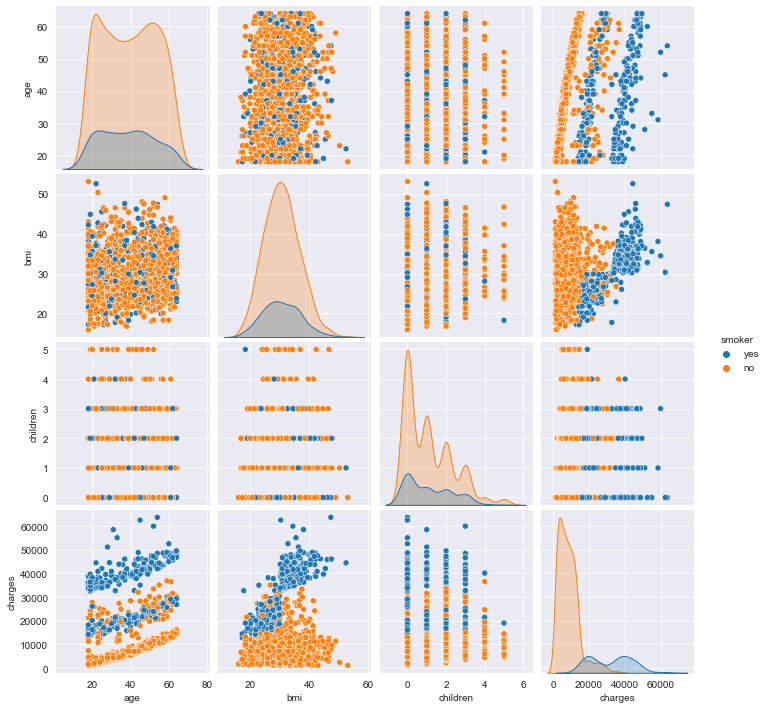

In [16]:
sns.pairplot(insurance, hue='smoker');

### Observation

- Three distinct clusters are visible - i) smokers ii) non-smokers iii) mixed
- Charges and age seems to be directly proportional.
- Smokers are generally charged higher. 
- Non-smokers who resides under "mixed" cluster are charged higher than non-smoker whereas smokers but part of "mixed" clusters are charged lessers than the "smoker" cluster.
- Smokers within "mixed" clusters are following a linear relationship but non-smokers

In [17]:
mix_smk = insurance.loc[(insurance['charges']<=30000) & (insurance['smoker'] == 'yes')]
smk = insurance.loc[(insurance['charges']>30000) & (insurance['smoker'] == 'yes')]

smk['sex'].value_counts()

male      98
female    54
Name: sex, dtype: int64

In [18]:
mix_smk['sex'].value_counts()

female    61
male      61
Name: sex, dtype: int64

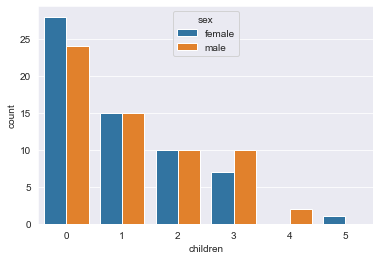

In [19]:
#Lets see the comparative counts of male, female based on no. of children

sns.countplot(x= 'children', data=mix_smk, hue='sex');

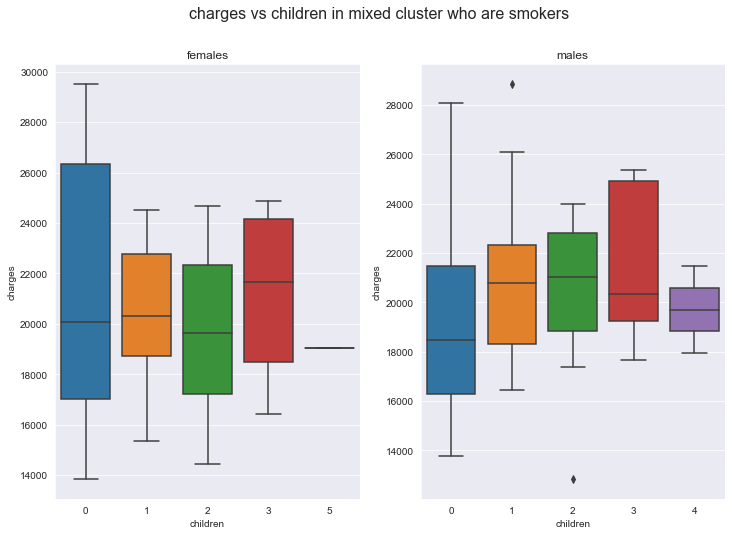

In [20]:
f = mix_smk.loc[mix_smk['sex']=='female']
m = mix_smk.loc[mix_smk['sex']=='male']

fig, axes = plt.subplots(1, 2, figsize=(12, 8))

fig.suptitle("charges vs children in mixed cluster who are smokers", fontsize=16)
sns.boxplot(x = 'children', y='charges', data=f, ax=axes[0])
axes[0].title.set_text("females")
sns.boxplot(x = 'children', y='charges', data=m, ax=axes[1])
axes[1].title.set_text("males");

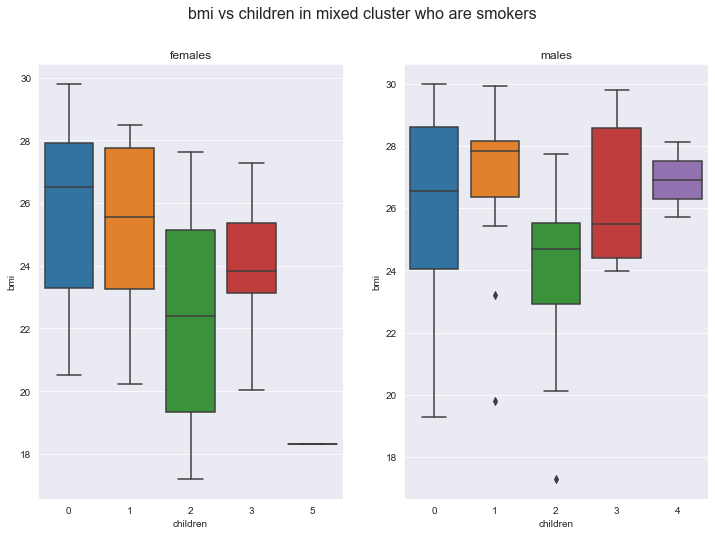

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

fig.suptitle("bmi vs children in mixed cluster who are smokers", fontsize=16)
sns.boxplot(x = 'children', y='bmi', data=f, ax=axes[0])
axes[0].title.set_text("females")
sns.boxplot(x = 'children', y='bmi', data=m, ax=axes[1])
axes[1].title.set_text("males");

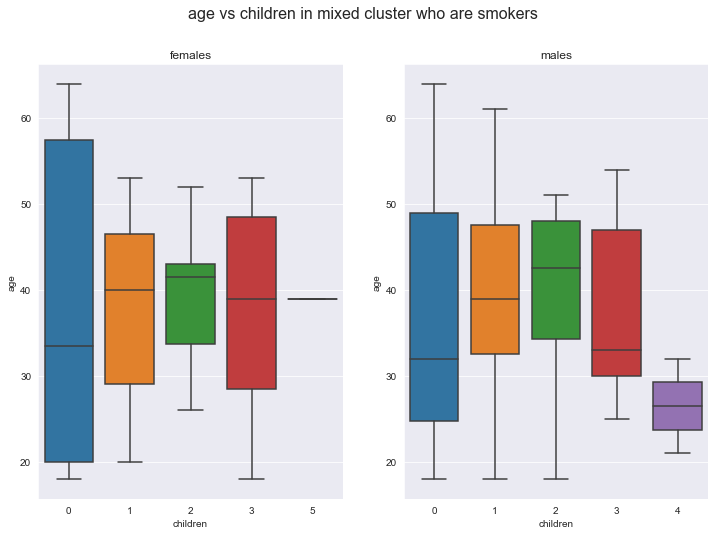

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

fig.suptitle("age vs children in mixed cluster who are smokers", fontsize=16)
sns.boxplot(x = 'children', y='age', data=f, ax=axes[0])
axes[0].title.set_text("females")
sns.boxplot(x = 'children', y='age', data=m, ax=axes[1])
axes[1].title.set_text("males");

### Observation

- For mixed cluster age range is more within women smokers who has no children.
- For mixed cluster charges is more within women smokers who has no children.
- Count for smoker female with no children is more than males.

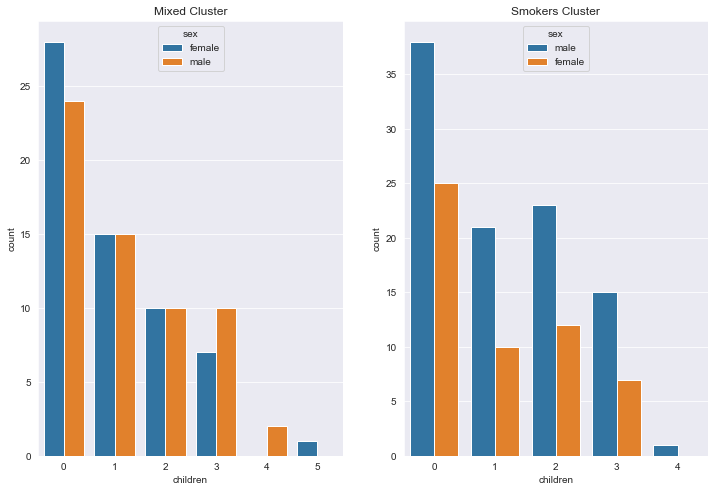

In [23]:
#Lets compare the Smoker cluster & mixed dataset with countplot

fig, axes = plt.subplots(1, 2, figsize=(12, 8))

sns.countplot(x='children', data=mix_smk, hue='sex', ax=axes[0])
sns.countplot(x='children', data=smk, hue='sex', ax=axes[1])
axes[0].title.set_text('Mixed Cluster')
axes[1].title.set_text('Smokers Cluster');

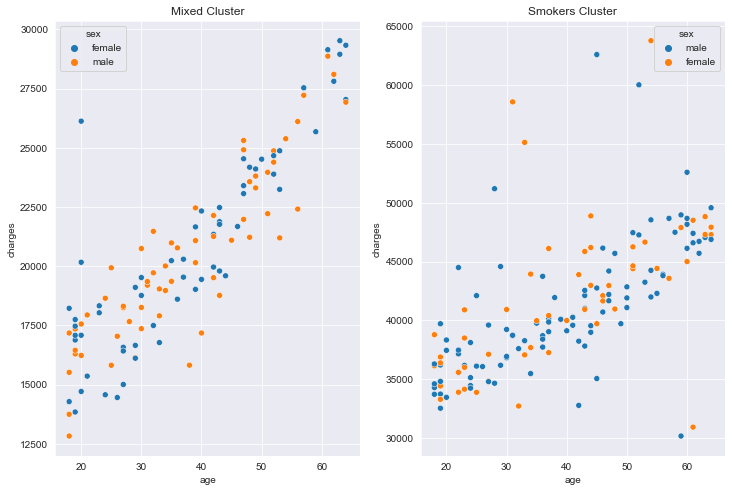

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

sns.scatterplot(x='age', y='charges',data=mix_smk, hue='sex', ax=axes[0])
sns.scatterplot(x='age', y='charges',data=smk, hue='sex', ax=axes[1])
axes[0].title.set_text('Mixed Cluster')
axes[1].title.set_text('Smokers Cluster');

In [25]:
#Above 40 candidates

print(mix_smk.shape[0], mix_smk[mix_smk['age']>40]['age'].count())
print(smk.shape[0], smk[smk['age']>40]['age'].count())
#smk[smk['age']>40]['age'].count()

122 51
152 74


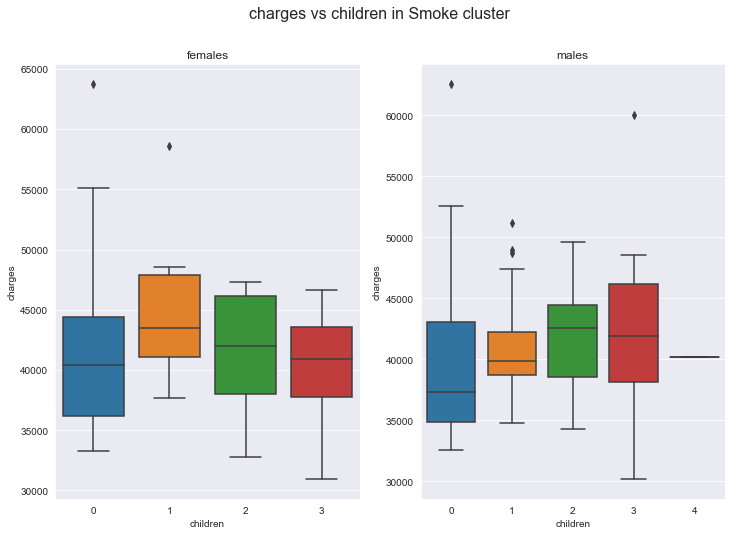

In [26]:
#boxplot for charges on sexes based on children

f_s = smk.loc[smk['sex']=='female']
m_s = smk.loc[smk['sex']=='male']

fig, axes = plt.subplots(1, 2, figsize=(12, 8))

fig.suptitle("charges vs children in Smoke cluster", fontsize=16)
sns.boxplot(x = 'children', y='charges', data=f_s, ax=axes[0])
axes[0].title.set_text("females")
sns.boxplot(x = 'children', y='charges', data=m_s, ax=axes[1])
axes[1].title.set_text("males");

### Observation

- There are certain outliers that needs to be treated.
- no. of children doesn't seem to be creating any difference in charges

In [27]:
#Lets now see the distibution of sexes in different age range and incured charges etc.

ins_smk = insurance[insurance['smoker']=='yes']
ins_smk_cp = ins_smk.copy()
ins_smk_cp.sort_values('age', inplace=True)

ins_smk_cp['age_range'] = np.where(ins_smk_cp['age']<=20, '17-20',
                               np.where(ins_smk_cp['age']<=25, '21-25',
                                       np.where(ins_smk_cp['age']<=30, '26-30',
                                               np.where(ins_smk_cp['age']<=35, '31-35',
                                                       np.where(ins_smk_cp['age']<=40, '36-40',
                                                               np.where(ins_smk_cp['age']<=45, '41-45', '45+'))))))

In [28]:
ins_smk_grp = ins_smk_cp.groupby(['age_range', 'sex']).aggregate({'charges': 'mean', 'bmi': ['mean', 'count']}).reset_index()
ins_smk_grp.columns = ['age_range', 'sex', 'charges_mean', 'bmi_mean', 'total_records']
#ins_smk_grp.sort_values('charges_mean', inplace=True)
ins_smk_grp

,age_range,sex,charges_mean,bmi_mean,total_records
0,17-20,female,24094.753987,28.760000,17
1,17-20,male,27421.141389,31.092955,22
2,21-25,female,29027.282191,30.399091,11
3,21-25,male,32233.675935,34.349667,15
4,26-30,female,22127.861954,25.837917,12
5,26-30,male,29663.995981,31.135278,18
6,31-35,female,35965.667852,29.284500,10
7,31-35,male,26539.353694,29.843125,16
8,36-40,female,28712.160308,29.369167,12
9,36-40,male,32272.977488,31.782500,16


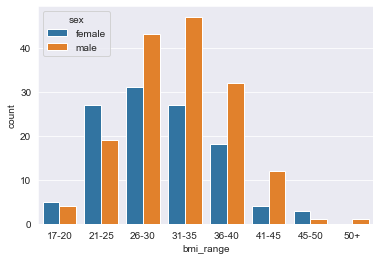

In [29]:
#Lets now see the distibution of sexes in different bmi range.

ins_smk_cpp = ins_smk.copy()
ins_smk_cpp.sort_values('bmi', inplace=True)

ins_smk_cpp['bmi_range'] = np.where(ins_smk_cpp['bmi']<20, '17-20',
                               np.where(ins_smk_cpp['bmi']<25, '21-25',
                                       np.where(ins_smk_cpp['bmi']<30, '26-30',
                                               np.where(ins_smk_cpp['bmi']<35, '31-35',
                                                       np.where(ins_smk_cpp['bmi']<40, '36-40',
                                                               np.where(ins_smk_cpp['bmi']<45, '41-45',
                                                                       np.where(ins_smk_cpp['bmi']<50, '45-50', '50+')))))))


sns.countplot(x='bmi_range', data=ins_smk_cpp, hue='sex');

In [30]:
ins_smk['sex'].value_counts()

male      159
female    115
Name: sex, dtype: int64

### Observation

- BMI is key factor for charge. If bmi increases, the charge gets increased and vice-versa.
- Smokers above 40 are charged more for males than females.
- There are more male smokers than females.
- Female smokers within age range of 31-35 are charged more than the smoker males of the same age range. 
- Further analysis required for above 40 age range to understand the charging

In [31]:
#Checking data for age range 31-35 years

ins_rg = ins_smk_cp[ins_smk_cp['age_range'] == '31-35']
ins_rg

,age,sex,bmi,children,smoker,region,charges,age_range
1179,31,male,29.810,0,yes,southeast,19350.36890,31-35
29,31,male,36.300,2,yes,southwest,38711.00000,31-35
577,31,female,38.095,1,yes,northeast,58571.07448,31-35
298,31,male,34.390,3,yes,northwest,38746.35510,31-35
982,31,male,25.900,3,yes,southwest,19199.94400,31-35
1249,32,male,33.630,1,yes,northeast,37607.52770,31-35
1307,32,male,28.120,4,yes,northwest,21472.47880,31-35
909,32,female,24.600,0,yes,southwest,17496.30600,31-35
885,32,male,28.930,1,yes,southeast,19719.69470,31-35
128,32,female,17.765,2,yes,northwest,32734.18630,31-35


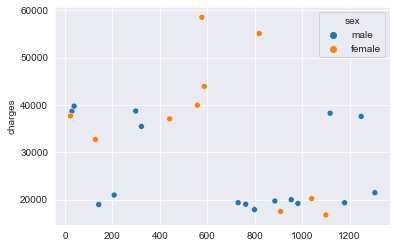

In [32]:
sns.scatterplot(y='charges', x=ins_rg.index, data=ins_rg, hue='sex');

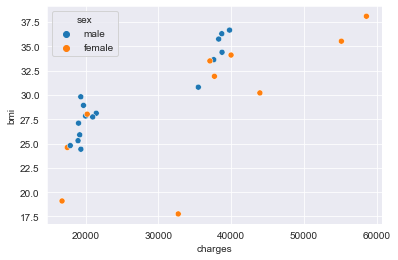

In [33]:
sns.scatterplot(y='bmi', x='charges', data=ins_rg, hue='sex');

### Observation

- It looks like some outliers exist for females betwen age range of 31-35 years.
- For few instances charge is more even though bmi is less.

In [34]:
#Lets chdeck non smoker data

ins_ns = insurance[insurance['smoker']=='no']
ins_ns['sex'].value_counts()

female    547
male      517
Name: sex, dtype: int64

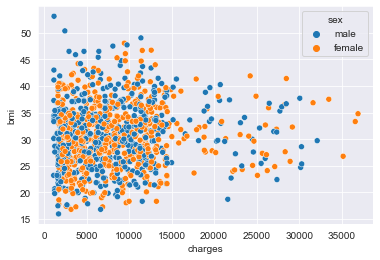

In [35]:
sns.scatterplot(y='bmi', x='charges', data=ins_ns, hue='sex');

In [36]:
ins_ns_age = ins_ns.copy()
ins_ns_age.sort_values('age', inplace=True)
ins_ns_age['age_range'] = np.where(ins_ns_age['age']<=20, '17-20',
                               np.where(ins_ns_age['age']<=25, '21-25',
                                       np.where(ins_ns_age['age']<=30, '26-30',
                                               np.where(ins_ns_age['age']<=35, '31-35',
                                                       np.where(ins_ns_age['age']<=40, '36-40',
                                                               np.where(ins_ns_age['age']<=45, '41-45', '45+'))))))


ins_ns_ch = ins_ns_age[ins_ns_age['charges']>15000]
#sns.scatterplot(x='bmi', y='charges')
ins_ns_grp = ins_ns_ch.groupby('age_range').aggregate({'charges': ['count', 'mean'], 'bmi': 'mean'})
ins_ns_grp

charges                      bmi
            count          mean       mean
age_range                                 
17-20           6  22924.022378  30.718333
21-25          10  20710.052545  28.962000
26-30          11  19923.405753  30.928636
31-35           5  22279.676066  29.316000
36-40           5  21500.776616  34.162000
41-45           5  23265.775406  32.040000
45+            49  24561.378426  32.275612

### Observation

- Majority of the non-smokers exceeding charges greater than 15K are of 40+

# Final Findings

- Three clear clusters are visible - i) cluster 1 (Smokers), ii) cluser 2 (mixed) iii) cluster 3 (non-smokers).
- bmi and age are positively corelated with charges.
- Within same age range if the mean bmi is more, candidate will be charged more.
- Majority of highly charged non-smokers are above 40 years of age.
- If smoking habits to be considered then the dataset is imbalanced.
- Outliers exists for bmi and charges which need to be treated.
- Outliers present within 31-35 age range for female hence the mean charge is more.
- Overall male smokers are charged more than female smokers.
- BMI is less among smokers of cluster 2 compare to cluster 1.
- Almost 50% of candidates in cluster 1 are of above 40 years of age.

In [37]:
#Outlier treatment

ins_data = insurance.copy()
ins_data.loc[ins_data['charges']>50000, 'charges'] = 50000

ins_data.loc[ins_data['bmi']>50, 'bmi'] = 50

ins_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.658845,1.094918,13230.155774
std,14.049960,6.082704,1.205493,11969.723603
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,50.000000,5.000000,50000.000000


In [38]:
ins_dt = ins_data.copy()
ins_dt.sort_values('age', inplace=True)
ins_dt['age_range'] = np.where(ins_dt['age']<=20, '17-20',
                               np.where(ins_dt['age']<=25, '21-25',
                                       np.where(ins_dt['age']<=30, '26-30',
                                               np.where(ins_dt['age']<=35, '31-35',
                                                       np.where(ins_dt['age']<=40, '36-40',
                                                               np.where(ins_dt['age']<=45, '41-45', '45+'))))))


ins_age = ins_dt.drop('age', axis=1)
ins_age.sample(15)

,sex,bmi,children,smoker,region,charges,age_range
608,male,26.980,2,no,northeast,4435.09420,26-30
1319,female,26.315,2,no,northwest,7201.70085,36-40
446,male,29.640,0,no,northeast,12730.99960,45+
62,male,24.700,1,no,northwest,30166.61817,45+
952,female,28.405,1,no,northwest,4527.18295,26-30
185,male,41.895,3,yes,northeast,43753.33705,36-40
305,male,33.345,2,no,northwest,19442.35350,26-30
762,male,27.100,1,yes,southwest,19040.87600,31-35
86,female,31.160,0,yes,northwest,43578.93940,45+
343,male,36.765,0,no,northeast,13981.85035,45+


In [39]:
ins_age['age_range'].unique()

array(['17-20', '21-25', '26-30', '31-35', '36-40', '41-45', '45+'],
      dtype=object)

In [40]:
def createDummies(df, cols):
    for col in cols:
        enc= pd.get_dummies(df[col], prefix=col, drop_first=True)
        df = pd.concat([df, enc], axis=1)
        df = df.drop(col, axis=1)
    return df

In [41]:
#Create dummies

cat_cols = ['age_range', 'sex', 'smoker', 'region']
ins_all = createDummies(ins_age, cat_cols)
ins_all.head()

,bmi,children,charges,age_range_21-25,age_range_26-30,age_range_31-35,age_range_36-40,age_range_41-45,age_range_45+,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1248,39.82,0,1633.96180,0,0,0,0,0,0,0,0,0,1,0
482,31.35,0,1622.18850,0,0,0,0,0,0,0,0,0,1,0
492,25.08,0,2196.47320,0,0,0,0,0,0,0,0,0,0,0
525,33.88,0,11482.63485,0,0,0,0,0,0,0,0,0,1,0
529,25.46,0,1708.00140,0,0,0,0,0,0,1,0,0,0,0


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [43]:
#Scaling

# scaler = StandardScaler()
# scale = scaler.fit_transform(ins_all)
# ins_scale = pd.DataFrame(scale, columns=ins_all.columns)
# ins_scale

# 1. Considering Supervised Problem

In [44]:
#Performing stratified sampling as its an imbalanced dataset

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(ins_all, ins_all['smoker_yes']):
    train_set=ins_all.loc[train_index]
    test_set=ins_all.loc[test_index]

In [45]:
X_train = train_set.drop('charges', axis=1)
y_train = train_set["charges"].copy()
X_test = test_set.drop('charges', axis=1)
y_test = test_set["charges"].copy()

In [46]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, SGDRegressor

In [47]:
#Scaling

# scale_X = StandardScaler()
# scale_y = StandardScaler()
# y_train = y_train.values.reshape(1, -1)
# scaled_X = scale_X.fit_transform(X_train)
# scaled_y = scale_y.fit_transform(y_train)

scale = StandardScaler()
X_scaled = scale.fit_transform(X_train)

In [48]:
X_scaled

array([[ 2.93551   ,  0.71999604, -0.33506136, ..., -0.58382543,
        -0.60542461, -0.56223942],
       [-0.45251337,  0.71999604, -0.33506136, ...,  1.71284078,
        -0.60542461, -0.56223942],
       [ 1.05690253, -0.92967369, -0.33506136, ..., -0.58382543,
         1.65173333, -0.56223942],
       ...,
       [-0.65929414, -0.92967369, -0.33506136, ..., -0.58382543,
        -0.60542461,  1.77860173],
       [-0.65929414, -0.10483882, -0.33506136, ...,  1.71284078,
        -0.60542461, -0.56223942],
       [-0.43660716,  2.36966577, -0.33506136, ...,  1.71284078,
        -0.60542461, -0.56223942]])

In [49]:
svr=SVR()
svr.fit(X_train, y_train)

SVR()

In [50]:
def display_scores(scores):
    print('Scores: ' , scores)
    print('Mean: ' , scores.mean())
    print('Standard Deviation: ', scores.std())

In [51]:
svr_scores = cross_val_score(svr, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
svr_rmse = np.sqrt(-svr_scores)
display_scores(svr_rmse)

Scores:  [12533.66461343 12037.37201664 13742.81035717 10875.55770972
 12589.45256496]
Mean:  12355.771452382372
Standard Deviation:  927.6357784325616


In [52]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [53]:
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
lin_rmse = np.sqrt(-lin_scores)
display_scores(lin_rmse)

Scores:  [5977.62706158 6218.59761869 6634.92174073 5470.61890606 5878.97229819]
Mean:  6036.14752504878
Standard Deviation:  384.6478684481212


In [54]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

C:\Users\Debmalya\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDRegressor()

In [55]:
sgd_scores = cross_val_score(sgd, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
sgd_rmse = np.sqrt(-sgd_scores)
display_scores(sgd_rmse)

Scores:  [4.68940016e+06 4.67575225e+07 8.08781092e+07 3.99605822e+06
 2.56968323e+08]
Mean:  78657882.64339963
Standard Deviation:  93662052.05611497


In [56]:
final_pred = lin_reg.predict(X_test)

In [57]:
final_mse = mean_squared_error(final_pred, y_test)
final_rmse = np.sqrt(final_mse)
final_rmse

6161.166548533755

# 2. Considering Unsupervised Problem

In [58]:
from sklearn.cluster import KMeans

In [59]:
cluster = KMeans(n_clusters=3)
cluster.fit(train_set)

KMeans(n_clusters=3)

In [60]:
cluster.cluster_centers_

array([[3.48452991e+01, 1.12820513e+00, 4.09248738e+04, 1.19658120e-01,
        7.69230769e-02, 7.69230769e-02, 9.40170940e-02, 1.19658120e-01,
        4.01709402e-01, 6.15384615e-01, 9.74358974e-01, 1.88034188e-01,
        3.67521368e-01, 2.30769231e-01],
       [3.04522207e+01, 1.10505319e+00, 6.81490821e+03, 1.09042553e-01,
        1.10372340e-01, 1.03723404e-01, 1.03723404e-01, 1.03723404e-01,
        3.45744681e-01, 4.89361702e-01, 1.32978723e-03, 2.53989362e-01,
        2.51329787e-01, 2.59308511e-01],
       [2.83497761e+01, 1.20895522e+00, 2.04667324e+04, 5.97014925e-02,
        1.14427861e-01, 7.46268657e-02, 6.96517413e-02, 8.45771144e-02,
        4.77611940e-01, 4.67661692e-01, 5.02487562e-01, 2.93532338e-01,
        2.73631841e-01, 1.74129353e-01]])

In [61]:
cluster.predict(test_set)

array([2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       1, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2,
       1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 2, 0, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 1,
       1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 0, 1, 1, 2,
       1, 1, 1, 0])